In [1]:
# Import packages/data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
# Check for null entries

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
# Too many entries are missing from "Cabin" so it looks like we're going to have to drop that feature

df2 = df.drop(columns='Cabin')
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [4]:
# Before we drop the "Embarked" nan rows, let's see if the feature is correlated with "Survived"
# If not, we can just drop the whole "Embarked" column and keep the remaining info in the rows
# While we're at it, let's check correlations for all our features
# First, let's relabel categorical features using integers

df3 = df2.copy()
cols = ['Name','Sex','Ticket','Embarked']

for col in cols:

    unique = df3[col].unique()
    unique_to_int = {unique:i for i,unique in enumerate(unique)}
    print(col, unique_to_int,'\n')
    df3[col] = df3[col].apply( lambda x: unique_to_int[x] )

df3

Name {'Braund, Mr. Owen Harris': 0, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)': 1, 'Heikkinen, Miss. Laina': 2, 'Futrelle, Mrs. Jacques Heath (Lily May Peel)': 3, 'Allen, Mr. William Henry': 4, 'Moran, Mr. James': 5, 'McCarthy, Mr. Timothy J': 6, 'Palsson, Master. Gosta Leonard': 7, 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)': 8, 'Nasser, Mrs. Nicholas (Adele Achem)': 9, 'Sandstrom, Miss. Marguerite Rut': 10, 'Bonnell, Miss. Elizabeth': 11, 'Saundercock, Mr. William Henry': 12, 'Andersson, Mr. Anders Johan': 13, 'Vestrom, Miss. Hulda Amanda Adolfina': 14, 'Hewlett, Mrs. (Mary D Kingcome) ': 15, 'Rice, Master. Eugene': 16, 'Williams, Mr. Charles Eugene': 17, 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)': 18, 'Masselmani, Mrs. Fatima': 19, 'Fynney, Mr. Joseph J': 20, 'Beesley, Mr. Lawrence': 21, 'McGowan, Miss. Anna "Annie"': 22, 'Sloper, Mr. William Thompson': 23, 'Palsson, Miss. Torborg Danira': 24, 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansso

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,0,22.0,1,0,0,7.2500,0
1,2,1,1,1,1,38.0,1,0,1,71.2833,1
2,3,1,3,2,1,26.0,0,0,2,7.9250,0
3,4,1,1,3,1,35.0,1,0,3,53.1000,0
4,5,0,3,4,0,35.0,0,0,4,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,886,0,27.0,0,0,677,13.0000,0
887,888,1,1,887,1,19.0,0,0,678,30.0000,0
888,889,0,3,888,1,NaN,1,2,614,23.4500,0
889,890,1,1,889,0,26.0,0,0,679,30.0000,1


<AxesSubplot:>

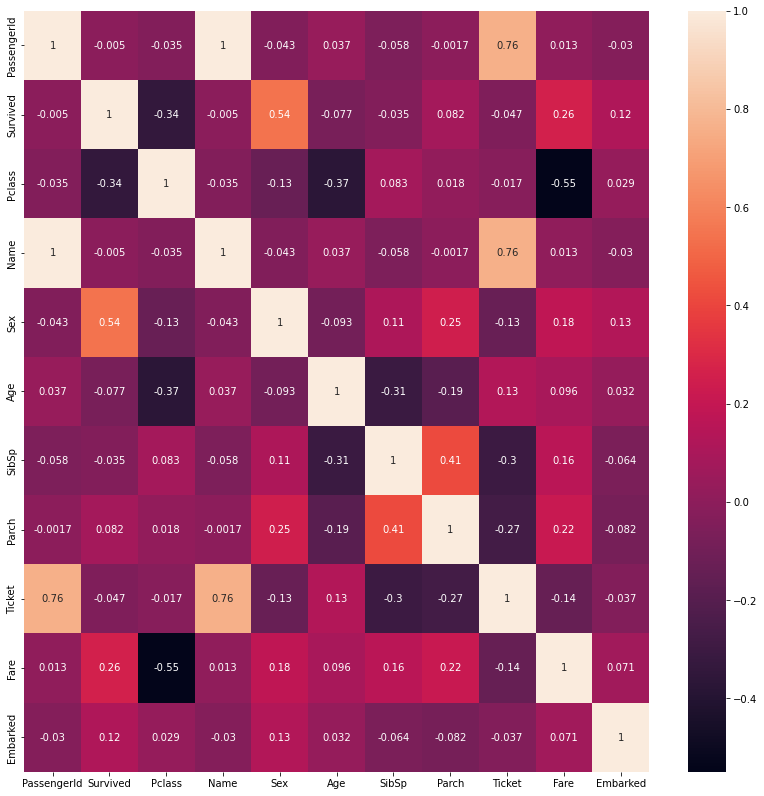

In [5]:
# Plot correlation heatmap for our dataset

fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(df3.corr(),annot=True)

In [7]:
# Looking at heatmap, we pick out features that have non-negligible correlations with "Survived"

cols_to_keep = ['Survived','Pclass','Sex','Fare','Embarked']
df4 = df3[cols_to_keep]

df4

,Survived,Pclass,Sex,Fare,Embarked
0,0,3,0,7.2500,0
1,1,1,1,71.2833,1
2,1,3,1,7.9250,0
3,1,1,1,53.1000,0
4,0,3,0,8.0500,0
...,...,...,...,...,...
886,0,2,0,13.0000,0
887,1,1,1,30.0000,0
888,0,3,1,23.4500,0
889,1,1,0,30.0000,1


In [8]:
# "Embarked" is correlated with "Survived", so let's drop the nan rows
# But first, we convert int labels back to original categorical info

sex_map = {0:'male', 1:'female'}
embarked_map = {0:'S', 1:'C', 2:'Q', 3:np.nan}
maps = [sex_map,embarked_map]

df5 = df4.copy()
cols = ['Sex','Embarked']

for i in range(len(cols)):
    int_to_unique = maps[i]
    df5[cols[i]] = df5[cols[i]].apply( lambda x: int_to_unique[x] )

df5

,Survived,Pclass,Sex,Fare,Embarked
0,0,3,male,7.2500,S
1,1,1,female,71.2833,C
2,1,3,female,7.9250,S
3,1,1,female,53.1000,S
4,0,3,male,8.0500,S
...,...,...,...,...,...
886,0,2,male,13.0000,S
887,1,1,female,30.0000,S
888,0,3,female,23.4500,S
889,1,1,male,30.0000,C


In [9]:
# Drop nan rows

df6 = df5.dropna()
df6

,Survived,Pclass,Sex,Fare,Embarked
0,0,3,male,7.2500,S
1,1,1,female,71.2833,C
2,1,3,female,7.9250,S
3,1,1,female,53.1000,S
4,0,3,male,8.0500,S
...,...,...,...,...,...
886,0,2,male,13.0000,S
887,1,1,female,30.0000,S
888,0,3,female,23.4500,S
889,1,1,male,30.0000,C


In [10]:
# Create train X and y

X_train = df6.drop(columns='Survived')
y_train = df6['Survived']

X_train

,Pclass,Sex,Fare,Embarked
0,3,male,7.2500,S
1,1,female,71.2833,C
2,3,female,7.9250,S
3,1,female,53.1000,S
4,3,male,8.0500,S
...,...,...,...,...
886,2,male,13.0000,S
887,1,female,30.0000,S
888,3,female,23.4500,S
889,1,male,30.0000,C


In [11]:
# Define categorical features

cat_columns = ['Pclass','Sex','Embarked']
print("Names of categorical columns : ", cat_columns)

cat_idx = [X_train.columns.get_loc(col) for col in cat_columns]
print("Indices of categorical columns : ", cat_idx)

Names of categorical columns :  ['Pclass', 'Sex', 'Embarked']
Indices of categorical columns :  [0, 1, 3]


In [44]:
# Create catboost model and run grid search

from catboost import Pool
from catboost import CatBoostClassifier

train_data = Pool(data=X_train,
                  label=y_train,
                  cat_features=cat_idx
                 )

model = CatBoostClassifier(random_seed=2022)

grid = {'iterations':[1000, 2500, 5000],
        'learning_rate': [0.1, 0.5, 1],
        'depth': [4, 6, 8, 10],
        'l2_leaf_reg': [2, 6, 10],
        'early_stopping_rounds': [0, 5, 10]}

grid_search_result = model.grid_search(grid,
                                       train_data,
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6398880	test: 0.6413507	best: 0.6413507 (0)	total: 14.1ms	remaining: 14.1s
1:	learn: 0.5993166	test: 0.6008663	best: 0.6008663 (1)	total: 25.3ms	remaining: 12.6s
2:	learn: 0.5776717	test: 0.5761548	best: 0.5761548 (2)	total: 34.3ms	remaining: 11.4s
3:	learn: 0.5609620	test: 0.5581964	best: 0.5581964 (3)	total: 40.3ms	remaining: 10s
4:	learn: 0.5394552	test: 0.5380598	best: 0.5380598 (4)	total: 51.3ms	remaining: 10.2s
5:	learn: 0.5213892	test: 0.5235921	best: 0.5235921 (5)	total: 62.3ms	remaining: 10.3s
6:	learn: 0.5086966	test: 0.5078271	best: 0.5078271 (6)	total: 72.7ms	remaining: 10.3s
7:	learn: 0.4957766	test: 0.4942466	best: 0.4942466 (7)	total: 83.2ms	remaining: 10.3s
8:	learn: 0.4832638	test: 0.4795511	best: 0.4795511 (8)	total: 94ms	remaining: 10.4s
9:	learn: 0.4754619	test: 0.4710369	best: 0.4710369 (9)	total: 105ms	remaining: 10.4s
10:	learn: 0.4690610	test: 0.4658185	best: 0.4658185 (10)	total: 115ms	remaining: 10.4s
11:	learn: 0.4634532	test: 0.4603263	best: 0.46

23:	learn: 0.4348394	test: 0.4420169	best: 0.4420169 (23)	total: 305ms	remaining: 12.4s
24:	learn: 0.4346620	test: 0.4414352	best: 0.4414352 (24)	total: 314ms	remaining: 12.2s
25:	learn: 0.4337159	test: 0.4411545	best: 0.4411545 (25)	total: 325ms	remaining: 12.2s
26:	learn: 0.4327215	test: 0.4400593	best: 0.4400593 (26)	total: 338ms	remaining: 12.2s
27:	learn: 0.4319893	test: 0.4387489	best: 0.4387489 (27)	total: 349ms	remaining: 12.1s
28:	learn: 0.4305197	test: 0.4369545	best: 0.4369545 (28)	total: 361ms	remaining: 12.1s
29:	learn: 0.4302442	test: 0.4366763	best: 0.4366763 (29)	total: 374ms	remaining: 12.1s
30:	learn: 0.4299283	test: 0.4361834	best: 0.4361834 (30)	total: 383ms	remaining: 12s
31:	learn: 0.4294014	test: 0.4357084	best: 0.4357084 (31)	total: 395ms	remaining: 11.9s
32:	learn: 0.4293255	test: 0.4357418	best: 0.4357084 (31)	total: 406ms	remaining: 11.9s
33:	learn: 0.4286362	test: 0.4357489	best: 0.4357084 (31)	total: 418ms	remaining: 11.9s
34:	learn: 0.4284730	test: 0.43559

6:	learn: 0.4283608	test: 0.4790167	best: 0.4431244 (1)	total: 70.3ms	remaining: 9.97s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.4431243965
bestIteration = 1

8:	loss: 0.4431244	best: 0.4292892 (1)	total: 2.36s	remaining: 1m 22s
0:	learn: 0.6398880	test: 0.6413507	best: 0.6413507 (0)	total: 9.69ms	remaining: 24.2s
1:	learn: 0.5993166	test: 0.6008663	best: 0.6008663 (1)	total: 20.5ms	remaining: 25.6s
2:	learn: 0.5776717	test: 0.5761548	best: 0.5761548 (2)	total: 29.5ms	remaining: 24.6s
3:	learn: 0.5609620	test: 0.5581964	best: 0.5581964 (3)	total: 36.7ms	remaining: 22.9s
4:	learn: 0.5394552	test: 0.5380598	best: 0.5380598 (4)	total: 51.2ms	remaining: 25.5s
5:	learn: 0.5213892	test: 0.5235921	best: 0.5235921 (5)	total: 63.7ms	remaining: 26.5s
6:	learn: 0.5086966	test: 0.5078271	best: 0.5078271 (6)	total: 74.7ms	remaining: 26.6s
7:	learn: 0.4957766	test: 0.4942466	best: 0.4942466 (7)	total: 85.3ms	remaining: 26.6s
8:	learn: 0.4832638	test: 0.4795511	best: 0.479551

19:	learn: 0.4404376	test: 0.4441438	best: 0.4441438 (19)	total: 217ms	remaining: 26.9s
20:	learn: 0.4398435	test: 0.4445373	best: 0.4441438 (19)	total: 228ms	remaining: 26.9s
21:	learn: 0.4384358	test: 0.4427979	best: 0.4427979 (21)	total: 240ms	remaining: 27s
22:	learn: 0.4375730	test: 0.4422216	best: 0.4422216 (22)	total: 253ms	remaining: 27.2s
23:	learn: 0.4348394	test: 0.4420169	best: 0.4420169 (23)	total: 265ms	remaining: 27.3s
24:	learn: 0.4346620	test: 0.4414352	best: 0.4414352 (24)	total: 272ms	remaining: 26.9s
25:	learn: 0.4337159	test: 0.4411545	best: 0.4411545 (25)	total: 285ms	remaining: 27.1s
26:	learn: 0.4327215	test: 0.4400593	best: 0.4400593 (26)	total: 295ms	remaining: 27s
27:	learn: 0.4319893	test: 0.4387489	best: 0.4387489 (27)	total: 306ms	remaining: 27s
28:	learn: 0.4305197	test: 0.4369545	best: 0.4369545 (28)	total: 317ms	remaining: 27s
29:	learn: 0.4302442	test: 0.4366763	best: 0.4366763 (29)	total: 328ms	remaining: 27s
30:	learn: 0.4299283	test: 0.4361834	best:

3:	learn: 0.4362372	test: 0.4437897	best: 0.4437897 (3)	total: 42.1ms	remaining: 26.3s
4:	learn: 0.4341573	test: 0.4406418	best: 0.4406418 (4)	total: 54.1ms	remaining: 27s
5:	learn: 0.4289187	test: 0.4443079	best: 0.4406418 (4)	total: 65.5ms	remaining: 27.2s
6:	learn: 0.4257532	test: 0.4468238	best: 0.4406418 (4)	total: 77.1ms	remaining: 27.5s
7:	learn: 0.4256639	test: 0.4467305	best: 0.4406418 (4)	total: 87.1ms	remaining: 27.1s
8:	learn: 0.4235239	test: 0.4483156	best: 0.4406418 (4)	total: 100ms	remaining: 27.7s
9:	learn: 0.4215629	test: 0.4421610	best: 0.4406418 (4)	total: 111ms	remaining: 27.5s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.4406417864
bestIteration = 4

16:	loss: 0.4406418	best: 0.4292892 (1)	total: 4.45s	remaining: 1m 20s
0:	learn: 0.4446048	test: 0.4494042	best: 0.4494042 (0)	total: 9.42ms	remaining: 23.5s
1:	learn: 0.4404868	test: 0.4431244	best: 0.4431244 (1)	total: 19.9ms	remaining: 24.9s
2:	learn: 0.4404502	test: 0.4445263	best: 0.4431244 (

10:	learn: 0.4707739	test: 0.4708037	best: 0.4708037 (10)	total: 114ms	remaining: 51.7s
11:	learn: 0.4643670	test: 0.4637846	best: 0.4637846 (11)	total: 125ms	remaining: 52.1s
12:	learn: 0.4589977	test: 0.4594569	best: 0.4594569 (12)	total: 140ms	remaining: 53.7s
13:	learn: 0.4545688	test: 0.4545238	best: 0.4545238 (13)	total: 153ms	remaining: 54.7s
14:	learn: 0.4510654	test: 0.4525782	best: 0.4525782 (14)	total: 165ms	remaining: 54.9s
15:	learn: 0.4485224	test: 0.4500296	best: 0.4500296 (15)	total: 179ms	remaining: 55.7s
16:	learn: 0.4475336	test: 0.4500245	best: 0.4500245 (16)	total: 191ms	remaining: 55.8s
17:	learn: 0.4444719	test: 0.4470577	best: 0.4470577 (17)	total: 202ms	remaining: 55.8s
18:	learn: 0.4421556	test: 0.4454266	best: 0.4454266 (18)	total: 213ms	remaining: 55.7s
19:	learn: 0.4404376	test: 0.4441438	best: 0.4441438 (19)	total: 224ms	remaining: 55.8s
20:	learn: 0.4398435	test: 0.4445373	best: 0.4441438 (19)	total: 235ms	remaining: 55.8s
21:	learn: 0.4384358	test: 0.442

33:	learn: 0.4285701	test: 0.4383093	best: 0.4383093 (33)	total: 349ms	remaining: 51s
34:	learn: 0.4280433	test: 0.4377101	best: 0.4377101 (34)	total: 362ms	remaining: 51.4s
35:	learn: 0.4280020	test: 0.4375970	best: 0.4375970 (35)	total: 373ms	remaining: 51.4s
36:	learn: 0.4280003	test: 0.4375957	best: 0.4375957 (36)	total: 377ms	remaining: 50.6s
37:	learn: 0.4273587	test: 0.4379182	best: 0.4375957 (36)	total: 391ms	remaining: 51.1s
38:	learn: 0.4273566	test: 0.4379176	best: 0.4375957 (36)	total: 399ms	remaining: 50.7s
39:	learn: 0.4271724	test: 0.4376788	best: 0.4375957 (36)	total: 411ms	remaining: 51s
40:	learn: 0.4267387	test: 0.4377169	best: 0.4375957 (36)	total: 424ms	remaining: 51.2s
41:	learn: 0.4251492	test: 0.4377812	best: 0.4375957 (36)	total: 436ms	remaining: 51.4s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.4375956873
bestIteration = 36

24:	loss: 0.4375957	best: 0.4292892 (1)	total: 6.46s	remaining: 1m 17s
0:	learn: 0.4972788	test: 0.5060503	best: 0

3:	learn: 0.4299761	test: 0.4457157	best: 0.4439603 (1)	total: 44.1ms	remaining: 11s
4:	learn: 0.4225462	test: 0.4495395	best: 0.4439603 (1)	total: 55.4ms	remaining: 11s
5:	learn: 0.4217546	test: 0.4488907	best: 0.4439603 (1)	total: 66.2ms	remaining: 11s
6:	learn: 0.4158453	test: 0.4409361	best: 0.4409361 (6)	total: 76.7ms	remaining: 10.9s
7:	learn: 0.4052538	test: 0.4501600	best: 0.4409361 (6)	total: 87.7ms	remaining: 10.9s
8:	learn: 0.4004091	test: 0.4414744	best: 0.4409361 (6)	total: 98.5ms	remaining: 10.8s
9:	learn: 0.3947676	test: 0.4324166	best: 0.4324166 (9)	total: 111ms	remaining: 11s
10:	learn: 0.3835331	test: 0.4395807	best: 0.4324166 (9)	total: 123ms	remaining: 11s
11:	learn: 0.3823454	test: 0.4425148	best: 0.4324166 (9)	total: 138ms	remaining: 11.3s
12:	learn: 0.3718833	test: 0.4408358	best: 0.4324166 (9)	total: 176ms	remaining: 13.4s
13:	learn: 0.3680210	test: 0.4575338	best: 0.4324166 (9)	total: 190ms	remaining: 13.4s
14:	learn: 0.3622928	test: 0.4414262	best: 0.4324166 (

24:	learn: 0.3724304	test: 0.4399869	best: 0.4326132 (15)	total: 283ms	remaining: 11s
25:	learn: 0.3696284	test: 0.4395767	best: 0.4326132 (15)	total: 297ms	remaining: 11.1s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.4326131683
bestIteration = 15

31:	loss: 0.4326132	best: 0.4222753 (29)	total: 8.53s	remaining: 1m 17s
0:	learn: 0.4432608	test: 0.4483794	best: 0.4483794 (0)	total: 9.05ms	remaining: 9.04s
1:	learn: 0.4391554	test: 0.4406484	best: 0.4406484 (1)	total: 19.9ms	remaining: 9.94s
2:	learn: 0.4391126	test: 0.4421837	best: 0.4406484 (1)	total: 25.9ms	remaining: 8.61s
3:	learn: 0.4383207	test: 0.4427202	best: 0.4406484 (1)	total: 36.6ms	remaining: 9.11s
4:	learn: 0.4343044	test: 0.4444798	best: 0.4406484 (1)	total: 47.3ms	remaining: 9.41s
5:	learn: 0.4325306	test: 0.4446469	best: 0.4406484 (1)	total: 57.8ms	remaining: 9.57s
6:	learn: 0.4325304	test: 0.4446477	best: 0.4406484 (1)	total: 61.5ms	remaining: 8.72s
7:	learn: 0.4203513	test: 0.4407319	best: 0.44

34:	loss: 0.4406418	best: 0.4222753 (29)	total: 9.52s	remaining: 1m 18s
0:	learn: 0.4446048	test: 0.4494042	best: 0.4494042 (0)	total: 10.1ms	remaining: 10.1s
1:	learn: 0.4404868	test: 0.4431244	best: 0.4431244 (1)	total: 24.8ms	remaining: 12.4s
2:	learn: 0.4404502	test: 0.4445263	best: 0.4431244 (1)	total: 31.3ms	remaining: 10.4s
3:	learn: 0.4395785	test: 0.4450754	best: 0.4431244 (1)	total: 42.8ms	remaining: 10.7s
4:	learn: 0.4369519	test: 0.4493481	best: 0.4431244 (1)	total: 53.2ms	remaining: 10.6s
5:	learn: 0.4330242	test: 0.4462449	best: 0.4431244 (1)	total: 64.3ms	remaining: 10.7s
6:	learn: 0.4283608	test: 0.4790167	best: 0.4431244 (1)	total: 75ms	remaining: 10.6s
7:	learn: 0.4221038	test: 0.4731455	best: 0.4431244 (1)	total: 85.6ms	remaining: 10.6s
8:	learn: 0.4154422	test: 0.4696285	best: 0.4431244 (1)	total: 96.4ms	remaining: 10.6s
9:	learn: 0.4115432	test: 0.4724787	best: 0.4431244 (1)	total: 107ms	remaining: 10.6s
10:	learn: 0.4108553	test: 0.4725283	best: 0.4431244 (1)	tota

15:	learn: 0.3602410	test: 0.4401208	best: 0.4324166 (9)	total: 178ms	remaining: 27.7s
16:	learn: 0.3552808	test: 0.4352442	best: 0.4324166 (9)	total: 192ms	remaining: 28s
17:	learn: 0.3529941	test: 0.4288179	best: 0.4288179 (17)	total: 203ms	remaining: 28s
18:	learn: 0.3458391	test: 0.4249411	best: 0.4249411 (18)	total: 214ms	remaining: 27.9s
19:	learn: 0.3363323	test: 0.4318633	best: 0.4249411 (18)	total: 225ms	remaining: 27.8s
20:	learn: 0.3353670	test: 0.4301638	best: 0.4249411 (18)	total: 235ms	remaining: 27.7s
21:	learn: 0.3300068	test: 0.4260987	best: 0.4249411 (18)	total: 246ms	remaining: 27.7s
22:	learn: 0.3286186	test: 0.4222753	best: 0.4222753 (22)	total: 256ms	remaining: 27.6s
23:	learn: 0.3219732	test: 0.4309558	best: 0.4222753 (22)	total: 267ms	remaining: 27.6s
24:	learn: 0.3155033	test: 0.4435490	best: 0.4222753 (22)	total: 278ms	remaining: 27.5s
25:	learn: 0.3124691	test: 0.4451246	best: 0.4222753 (22)	total: 288ms	remaining: 27.4s
26:	learn: 0.3101150	test: 0.4422263	b

25:	learn: 0.3696284	test: 0.4395767	best: 0.4326132 (15)	total: 280ms	remaining: 26.7s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.4326131683
bestIteration = 15

40:	loss: 0.4326132	best: 0.4222753 (29)	total: 11.5s	remaining: 1m 19s
0:	learn: 0.4432608	test: 0.4483794	best: 0.4483794 (0)	total: 9.67ms	remaining: 24.2s
1:	learn: 0.4391554	test: 0.4406484	best: 0.4406484 (1)	total: 23.8ms	remaining: 29.7s
2:	learn: 0.4391126	test: 0.4421837	best: 0.4406484 (1)	total: 30.9ms	remaining: 25.7s
3:	learn: 0.4383207	test: 0.4427202	best: 0.4406484 (1)	total: 44.6ms	remaining: 27.8s
4:	learn: 0.4343044	test: 0.4444798	best: 0.4406484 (1)	total: 55.4ms	remaining: 27.6s
5:	learn: 0.4325306	test: 0.4446469	best: 0.4406484 (1)	total: 66.2ms	remaining: 27.5s
6:	learn: 0.4325304	test: 0.4446477	best: 0.4406484 (1)	total: 69.9ms	remaining: 24.9s
7:	learn: 0.4203513	test: 0.4407319	best: 0.4406484 (1)	total: 81.1ms	remaining: 25.3s
8:	learn: 0.4154339	test: 0.4480929	best: 0.4

1:	learn: 0.4404868	test: 0.4431244	best: 0.4431244 (1)	total: 25.2ms	remaining: 31.5s
2:	learn: 0.4404502	test: 0.4445263	best: 0.4431244 (1)	total: 31.7ms	remaining: 26.4s
3:	learn: 0.4395785	test: 0.4450754	best: 0.4431244 (1)	total: 45.6ms	remaining: 28.4s
4:	learn: 0.4369519	test: 0.4493481	best: 0.4431244 (1)	total: 59ms	remaining: 29.4s
5:	learn: 0.4330242	test: 0.4462449	best: 0.4431244 (1)	total: 69.9ms	remaining: 29.1s
6:	learn: 0.4283608	test: 0.4790167	best: 0.4431244 (1)	total: 80.6ms	remaining: 28.7s
7:	learn: 0.4221038	test: 0.4731455	best: 0.4431244 (1)	total: 91.6ms	remaining: 28.5s
8:	learn: 0.4154422	test: 0.4696285	best: 0.4431244 (1)	total: 102ms	remaining: 28.3s
9:	learn: 0.4115432	test: 0.4724787	best: 0.4431244 (1)	total: 113ms	remaining: 28s
10:	learn: 0.4108553	test: 0.4725283	best: 0.4431244 (1)	total: 123ms	remaining: 27.8s
11:	learn: 0.4101472	test: 0.4727686	best: 0.4431244 (1)	total: 133ms	remaining: 27.6s
Stopped by overfitting detector  (10 iterations w

19:	learn: 0.3363323	test: 0.4318633	best: 0.4249411 (18)	total: 216ms	remaining: 53.7s
20:	learn: 0.3353670	test: 0.4301638	best: 0.4249411 (18)	total: 230ms	remaining: 54.4s
21:	learn: 0.3300068	test: 0.4260987	best: 0.4249411 (18)	total: 244ms	remaining: 55.2s
22:	learn: 0.3286186	test: 0.4222753	best: 0.4222753 (22)	total: 257ms	remaining: 55.7s
23:	learn: 0.3219732	test: 0.4309558	best: 0.4222753 (22)	total: 268ms	remaining: 55.6s
24:	learn: 0.3155033	test: 0.4435490	best: 0.4222753 (22)	total: 279ms	remaining: 55.5s
25:	learn: 0.3124691	test: 0.4451246	best: 0.4222753 (22)	total: 290ms	remaining: 55.4s
26:	learn: 0.3101150	test: 0.4422263	best: 0.4222753 (22)	total: 301ms	remaining: 55.4s
27:	learn: 0.3046379	test: 0.4345816	best: 0.4222753 (22)	total: 312ms	remaining: 55.3s
28:	learn: 0.3005375	test: 0.4340345	best: 0.4222753 (22)	total: 322ms	remaining: 55.3s
29:	learn: 0.2982707	test: 0.4328103	best: 0.4222753 (22)	total: 333ms	remaining: 55.1s
30:	learn: 0.2941577	test: 0.433

6:	learn: 0.4325304	test: 0.4446477	best: 0.4406484 (1)	total: 61.7ms	remaining: 44s
7:	learn: 0.4203513	test: 0.4407319	best: 0.4406484 (1)	total: 74.6ms	remaining: 46.6s
8:	learn: 0.4154339	test: 0.4480929	best: 0.4406484 (1)	total: 88.7ms	remaining: 49.2s
9:	learn: 0.4144868	test: 0.4481647	best: 0.4406484 (1)	total: 104ms	remaining: 52s
10:	learn: 0.4144131	test: 0.4481522	best: 0.4406484 (1)	total: 116ms	remaining: 52.4s
11:	learn: 0.4078801	test: 0.4385084	best: 0.4385084 (11)	total: 126ms	remaining: 52.5s
12:	learn: 0.4069508	test: 0.4374782	best: 0.4374782 (12)	total: 137ms	remaining: 52.6s
13:	learn: 0.4002616	test: 0.4281657	best: 0.4281657 (13)	total: 148ms	remaining: 52.8s
14:	learn: 0.3978362	test: 0.4281319	best: 0.4281319 (14)	total: 159ms	remaining: 52.7s
15:	learn: 0.3943081	test: 0.4291989	best: 0.4281319 (14)	total: 169ms	remaining: 52.7s
16:	learn: 0.3911905	test: 0.4291610	best: 0.4281319 (14)	total: 180ms	remaining: 52.7s
17:	learn: 0.3820792	test: 0.4341425	best:

3:	learn: 0.4395785	test: 0.4450754	best: 0.4431244 (1)	total: 37.5ms	remaining: 46.9s
4:	learn: 0.4369519	test: 0.4493481	best: 0.4431244 (1)	total: 49ms	remaining: 49s
5:	learn: 0.4330242	test: 0.4462449	best: 0.4431244 (1)	total: 59.9ms	remaining: 49.8s
6:	learn: 0.4283608	test: 0.4790167	best: 0.4431244 (1)	total: 71.6ms	remaining: 51.1s
7:	learn: 0.4221038	test: 0.4731455	best: 0.4431244 (1)	total: 84.4ms	remaining: 52.7s
8:	learn: 0.4154422	test: 0.4696285	best: 0.4431244 (1)	total: 131ms	remaining: 1m 12s
9:	learn: 0.4115432	test: 0.4724787	best: 0.4431244 (1)	total: 145ms	remaining: 1m 12s
10:	learn: 0.4108553	test: 0.4725283	best: 0.4431244 (1)	total: 161ms	remaining: 1m 12s
11:	learn: 0.4101472	test: 0.4727686	best: 0.4431244 (1)	total: 174ms	remaining: 1m 12s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.4431243965
bestIteration = 1

53:	loss: 0.4431244	best: 0.4222753 (29)	total: 15.6s	remaining: 1m 17s
0:	learn: 0.6363100	test: 0.6398112	best: 0.63981

58:	loss: 0.4318599	best: 0.4222753 (29)	total: 16.8s	remaining: 1m 15s
0:	learn: 0.4341884	test: 0.4375573	best: 0.4375573 (0)	total: 16.9ms	remaining: 16.8s
1:	learn: 0.4250217	test: 0.4382826	best: 0.4375573 (0)	total: 32.2ms	remaining: 16.1s
2:	learn: 0.4203377	test: 0.4412509	best: 0.4375573 (0)	total: 43.3ms	remaining: 14.4s
3:	learn: 0.4203377	test: 0.4412509	best: 0.4375573 (0)	total: 47.1ms	remaining: 11.7s
4:	learn: 0.4189880	test: 0.4404009	best: 0.4375573 (0)	total: 55.8ms	remaining: 11.1s
5:	learn: 0.4127727	test: 0.4617856	best: 0.4375573 (0)	total: 70.6ms	remaining: 11.7s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.4375572902
bestIteration = 0

59:	loss: 0.4375573	best: 0.4222753 (29)	total: 16.9s	remaining: 1m 14s
0:	learn: 0.6394242	test: 0.6419497	best: 0.6419497 (0)	total: 13.7ms	remaining: 13.6s
1:	learn: 0.6117350	test: 0.6124611	best: 0.6124611 (1)	total: 19.8ms	remaining: 9.87s
2:	learn: 0.5896975	test: 0.5888686	best: 0.5888686 (2)	total: 

7:	learn: 0.3949969	test: 0.4328006	best: 0.4280888 (6)	total: 114ms	remaining: 35.4s
8:	learn: 0.3913447	test: 0.4511488	best: 0.4280888 (6)	total: 130ms	remaining: 35.8s
9:	learn: 0.3861483	test: 0.4554243	best: 0.4280888 (6)	total: 145ms	remaining: 36.2s
10:	learn: 0.3847382	test: 0.4569394	best: 0.4280888 (6)	total: 161ms	remaining: 36.4s
11:	learn: 0.3822350	test: 0.4574553	best: 0.4280888 (6)	total: 176ms	remaining: 36.6s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.4280887525
bestIteration = 6

64:	loss: 0.4280888	best: 0.4222753 (29)	total: 18.3s	remaining: 1m 12s
0:	learn: 0.4388935	test: 0.4274861	best: 0.4274861 (0)	total: 14.3ms	remaining: 35.6s
1:	learn: 0.4138233	test: 0.4374903	best: 0.4274861 (0)	total: 29.9ms	remaining: 37.3s
2:	learn: 0.4085637	test: 0.4923708	best: 0.4274861 (0)	total: 42.6ms	remaining: 35.4s
3:	learn: 0.4085637	test: 0.4923756	best: 0.4274861 (0)	total: 46.7ms	remaining: 29.1s
4:	learn: 0.4024289	test: 0.4883973	best: 0.4274861

34:	learn: 0.4191726	test: 0.4400147	best: 0.4391758 (32)	total: 450ms	remaining: 31.7s
35:	learn: 0.4175640	test: 0.4399048	best: 0.4391758 (32)	total: 463ms	remaining: 31.7s
36:	learn: 0.4161943	test: 0.4412122	best: 0.4391758 (32)	total: 477ms	remaining: 31.7s
37:	learn: 0.4147205	test: 0.4411054	best: 0.4391758 (32)	total: 493ms	remaining: 32s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.4391758403
bestIteration = 32

69:	loss: 0.4391758	best: 0.4222753 (29)	total: 19.5s	remaining: 1m 10s
0:	learn: 0.4954490	test: 0.5015641	best: 0.5015641 (0)	total: 14.4ms	remaining: 35.9s
1:	learn: 0.4666656	test: 0.4653027	best: 0.4653027 (1)	total: 22.8ms	remaining: 28.5s
2:	learn: 0.4405905	test: 0.4390180	best: 0.4390180 (2)	total: 40.6ms	remaining: 33.8s
3:	learn: 0.4344089	test: 0.4450286	best: 0.4390180 (2)	total: 59.6ms	remaining: 37.2s
4:	learn: 0.4291540	test: 0.4388034	best: 0.4388034 (4)	total: 72.9ms	remaining: 36.4s
5:	learn: 0.4182806	test: 0.4328720	best: 0.4

13:	learn: 0.4474654	test: 0.4477070	best: 0.4477070 (13)	total: 195ms	remaining: 1m 9s
14:	learn: 0.4452026	test: 0.4474372	best: 0.4474372 (14)	total: 212ms	remaining: 1m 10s
15:	learn: 0.4424620	test: 0.4445898	best: 0.4445898 (15)	total: 223ms	remaining: 1m 9s
16:	learn: 0.4369449	test: 0.4411710	best: 0.4411710 (16)	total: 238ms	remaining: 1m 9s
17:	learn: 0.4333084	test: 0.4394965	best: 0.4394965 (17)	total: 253ms	remaining: 1m 10s
18:	learn: 0.4329306	test: 0.4399981	best: 0.4394965 (17)	total: 262ms	remaining: 1m 8s
19:	learn: 0.4324503	test: 0.4390640	best: 0.4390640 (19)	total: 270ms	remaining: 1m 7s
20:	learn: 0.4319210	test: 0.4388764	best: 0.4388764 (20)	total: 276ms	remaining: 1m 5s
21:	learn: 0.4287499	test: 0.4364486	best: 0.4364486 (21)	total: 292ms	remaining: 1m 5s
22:	learn: 0.4272787	test: 0.4362498	best: 0.4362498 (22)	total: 307ms	remaining: 1m 6s
23:	learn: 0.4252012	test: 0.4362790	best: 0.4362498 (22)	total: 321ms	remaining: 1m 6s
24:	learn: 0.4243527	test: 0.4

4:	learn: 0.4097592	test: 0.4467049	best: 0.4389181 (0)	total: 76.3ms	remaining: 1m 16s
5:	learn: 0.4088604	test: 0.4447647	best: 0.4389181 (0)	total: 92.3ms	remaining: 1m 16s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.4389180931
bestIteration = 0

80:	loss: 0.4389181	best: 0.4222753 (29)	total: 21.9s	remaining: 1m 5s
0:	learn: 0.6363100	test: 0.6398112	best: 0.6398112 (0)	total: 14.6ms	remaining: 14.6s
1:	learn: 0.6091112	test: 0.6106235	best: 0.6106235 (1)	total: 21.5ms	remaining: 10.7s
2:	learn: 0.5685259	test: 0.5586317	best: 0.5586317 (2)	total: 37.4ms	remaining: 12.4s
3:	learn: 0.5380349	test: 0.5310572	best: 0.5310572 (3)	total: 52.9ms	remaining: 13.2s
4:	learn: 0.5163368	test: 0.5088152	best: 0.5088152 (4)	total: 68.5ms	remaining: 13.6s
5:	learn: 0.5007446	test: 0.4943582	best: 0.4943582 (5)	total: 81.4ms	remaining: 13.5s
6:	learn: 0.4833544	test: 0.4796622	best: 0.4796622 (6)	total: 97ms	remaining: 13.8s
7:	learn: 0.4755940	test: 0.4727854	best: 0.47278

33:	learn: 0.4177461	test: 0.4362441	best: 0.4359080 (32)	total: 436ms	remaining: 12.4s
34:	learn: 0.4168008	test: 0.4347948	best: 0.4347948 (34)	total: 453ms	remaining: 12.5s
35:	learn: 0.4156713	test: 0.4344721	best: 0.4344721 (35)	total: 469ms	remaining: 12.6s
36:	learn: 0.4137923	test: 0.4356510	best: 0.4344721 (35)	total: 484ms	remaining: 12.6s
37:	learn: 0.4119463	test: 0.4363562	best: 0.4344721 (35)	total: 500ms	remaining: 12.6s
38:	learn: 0.4110337	test: 0.4365503	best: 0.4344721 (35)	total: 516ms	remaining: 12.7s
39:	learn: 0.4104115	test: 0.4367052	best: 0.4344721 (35)	total: 531ms	remaining: 12.7s
40:	learn: 0.4081151	test: 0.4364432	best: 0.4344721 (35)	total: 546ms	remaining: 12.8s
41:	learn: 0.4078060	test: 0.4366829	best: 0.4344721 (35)	total: 562ms	remaining: 12.8s
42:	learn: 0.4078057	test: 0.4366785	best: 0.4344721 (35)	total: 565ms	remaining: 12.6s
43:	learn: 0.4077022	test: 0.4365527	best: 0.4344721 (35)	total: 576ms	remaining: 12.5s
44:	learn: 0.4064692	test: 0.435

10:	learn: 0.3998391	test: 0.4526578	best: 0.4328720 (5)	total: 144ms	remaining: 12.9s
11:	learn: 0.3996545	test: 0.4513540	best: 0.4328720 (5)	total: 150ms	remaining: 12.3s
12:	learn: 0.3990796	test: 0.4513002	best: 0.4328720 (5)	total: 157ms	remaining: 11.9s
13:	learn: 0.3990624	test: 0.4512993	best: 0.4328720 (5)	total: 165ms	remaining: 11.6s
14:	learn: 0.3974890	test: 0.4512768	best: 0.4328720 (5)	total: 181ms	remaining: 11.9s
15:	learn: 0.3946517	test: 0.4539120	best: 0.4328720 (5)	total: 202ms	remaining: 12.4s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.4328719797
bestIteration = 5

88:	loss: 0.4328720	best: 0.4222753 (29)	total: 24.6s	remaining: 1m 4s
0:	learn: 0.4379668	test: 0.4389181	best: 0.4389181 (0)	total: 16.8ms	remaining: 16.8s
1:	learn: 0.4262850	test: 0.4435695	best: 0.4389181 (0)	total: 34.5ms	remaining: 17.2s
2:	learn: 0.4235787	test: 0.4445044	best: 0.4389181 (0)	total: 47.2ms	remaining: 15.7s
3:	learn: 0.4176038	test: 0.4401871	best: 0.4389

17:	learn: 0.4333084	test: 0.4394965	best: 0.4394965 (17)	total: 229ms	remaining: 31.6s
18:	learn: 0.4329306	test: 0.4399981	best: 0.4394965 (17)	total: 238ms	remaining: 31.1s
19:	learn: 0.4324503	test: 0.4390640	best: 0.4390640 (19)	total: 246ms	remaining: 30.5s
20:	learn: 0.4319210	test: 0.4388764	best: 0.4388764 (20)	total: 252ms	remaining: 29.8s
21:	learn: 0.4287499	test: 0.4364486	best: 0.4364486 (21)	total: 268ms	remaining: 30.2s
22:	learn: 0.4272787	test: 0.4362498	best: 0.4362498 (22)	total: 284ms	remaining: 30.5s
23:	learn: 0.4252012	test: 0.4362790	best: 0.4362498 (22)	total: 299ms	remaining: 30.8s
24:	learn: 0.4243527	test: 0.4360912	best: 0.4360912 (24)	total: 314ms	remaining: 31.1s
25:	learn: 0.4228406	test: 0.4368445	best: 0.4360912 (24)	total: 330ms	remaining: 31.4s
26:	learn: 0.4228102	test: 0.4367732	best: 0.4360912 (24)	total: 338ms	remaining: 31s
27:	learn: 0.4205632	test: 0.4370642	best: 0.4360912 (24)	total: 353ms	remaining: 31.2s
28:	learn: 0.4205500	test: 0.43700

34:	learn: 0.4191726	test: 0.4400147	best: 0.4391758 (32)	total: 442ms	remaining: 31.2s
35:	learn: 0.4175640	test: 0.4399048	best: 0.4391758 (32)	total: 456ms	remaining: 31.2s
36:	learn: 0.4161943	test: 0.4412122	best: 0.4391758 (32)	total: 469ms	remaining: 31.3s
37:	learn: 0.4147205	test: 0.4411054	best: 0.4391758 (32)	total: 490ms	remaining: 31.8s
38:	learn: 0.4147190	test: 0.4410930	best: 0.4391758 (32)	total: 494ms	remaining: 31.2s
39:	learn: 0.4136431	test: 0.4409252	best: 0.4391758 (32)	total: 509ms	remaining: 31.3s
40:	learn: 0.4136415	test: 0.4409193	best: 0.4391758 (32)	total: 516ms	remaining: 30.9s
41:	learn: 0.4136409	test: 0.4409150	best: 0.4391758 (32)	total: 520ms	remaining: 30.4s
42:	learn: 0.4134959	test: 0.4411420	best: 0.4391758 (32)	total: 526ms	remaining: 30.1s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.4391758403
bestIteration = 32

96:	loss: 0.4391758	best: 0.4222753 (29)	total: 27.2s	remaining: 1m 3s
0:	learn: 0.4954490	test: 0.5015641	be

10:	learn: 0.3505886	test: 0.5026434	best: 0.4274861 (0)	total: 148ms	remaining: 1m 6s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.427486124
bestIteration = 0

101:	loss: 0.4274861	best: 0.4222753 (29)	total: 28.5s	remaining: 1m 2s
0:	learn: 0.6372811	test: 0.6407964	best: 0.6407964 (0)	total: 20.4ms	remaining: 1m 42s
1:	learn: 0.6098282	test: 0.6114696	best: 0.6114696 (1)	total: 26.7ms	remaining: 1m 6s
2:	learn: 0.5770786	test: 0.5758127	best: 0.5758127 (2)	total: 35.5ms	remaining: 59.1s
3:	learn: 0.5500120	test: 0.5486002	best: 0.5486002 (3)	total: 48.4ms	remaining: 1m
4:	learn: 0.5264694	test: 0.5251865	best: 0.5251865 (4)	total: 65.3ms	remaining: 1m 5s
5:	learn: 0.5146298	test: 0.5123564	best: 0.5123564 (5)	total: 75ms	remaining: 1m 2s
6:	learn: 0.5057527	test: 0.5039827	best: 0.5039827 (6)	total: 85.2ms	remaining: 1m
7:	learn: 0.4994087	test: 0.4964405	best: 0.4964405 (7)	total: 93.2ms	remaining: 58.2s
8:	learn: 0.4849565	test: 0.4814132	best: 0.4814132 (8)

11:	learn: 0.4648029	test: 0.4638499	best: 0.4638499 (11)	total: 162ms	remaining: 1m 7s
12:	learn: 0.4595396	test: 0.4589988	best: 0.4589988 (12)	total: 178ms	remaining: 1m 8s
13:	learn: 0.4547338	test: 0.4555909	best: 0.4555909 (13)	total: 193ms	remaining: 1m 8s
14:	learn: 0.4532024	test: 0.4550780	best: 0.4550780 (14)	total: 206ms	remaining: 1m 8s
15:	learn: 0.4510382	test: 0.4542737	best: 0.4542737 (15)	total: 216ms	remaining: 1m 7s
16:	learn: 0.4469874	test: 0.4498017	best: 0.4498017 (16)	total: 231ms	remaining: 1m 7s
17:	learn: 0.4433254	test: 0.4480982	best: 0.4480982 (17)	total: 246ms	remaining: 1m 8s
18:	learn: 0.4401772	test: 0.4459576	best: 0.4459576 (18)	total: 261ms	remaining: 1m 8s
19:	learn: 0.4378464	test: 0.4456243	best: 0.4456243 (19)	total: 277ms	remaining: 1m 8s
20:	learn: 0.4337137	test: 0.4445962	best: 0.4445962 (20)	total: 292ms	remaining: 1m 9s
21:	learn: 0.4331476	test: 0.4450352	best: 0.4445962 (20)	total: 302ms	remaining: 1m 8s
22:	learn: 0.4323506	test: 0.444

2:	learn: 0.3860897	test: 0.4265485	best: 0.4254385 (1)	total: 65.4ms	remaining: 21.7s
3:	learn: 0.3830610	test: 0.4260453	best: 0.4254385 (1)	total: 81.2ms	remaining: 20.2s
4:	learn: 0.3743469	test: 0.4183656	best: 0.4183656 (4)	total: 102ms	remaining: 20.4s
5:	learn: 0.3647501	test: 0.4176391	best: 0.4176391 (5)	total: 126ms	remaining: 20.9s
6:	learn: 0.3603767	test: 0.4240041	best: 0.4176391 (5)	total: 148ms	remaining: 21s
7:	learn: 0.3489862	test: 0.4408931	best: 0.4176391 (5)	total: 170ms	remaining: 21s
8:	learn: 0.3400802	test: 0.4380186	best: 0.4176391 (5)	total: 191ms	remaining: 21.1s
9:	learn: 0.3166144	test: 0.4428228	best: 0.4176391 (5)	total: 213ms	remaining: 21.1s
10:	learn: 0.2871507	test: 0.4489320	best: 0.4176391 (5)	total: 234ms	remaining: 21.1s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.4176390904
bestIteration = 5

110:	loss: 0.4176391	best: 0.4176391 (110)	total: 31.3s	remaining: 1m
0:	learn: 0.6362887	test: 0.6407394	best: 0.6407394 (0)	tota

29:	learn: 0.4148508	test: 0.4375350	best: 0.4375350 (29)	total: 457ms	remaining: 14.8s
30:	learn: 0.4135906	test: 0.4375556	best: 0.4375350 (29)	total: 481ms	remaining: 15s
31:	learn: 0.4127900	test: 0.4374616	best: 0.4374616 (31)	total: 508ms	remaining: 15.4s
32:	learn: 0.4127246	test: 0.4373296	best: 0.4373296 (32)	total: 525ms	remaining: 15.4s
33:	learn: 0.4104539	test: 0.4369113	best: 0.4369113 (33)	total: 547ms	remaining: 15.5s
34:	learn: 0.4103606	test: 0.4370643	best: 0.4369113 (33)	total: 559ms	remaining: 15.4s
35:	learn: 0.4084272	test: 0.4369119	best: 0.4369113 (33)	total: 580ms	remaining: 15.5s
36:	learn: 0.4064427	test: 0.4364199	best: 0.4364199 (36)	total: 601ms	remaining: 15.7s
37:	learn: 0.4040040	test: 0.4365517	best: 0.4364199 (36)	total: 623ms	remaining: 15.8s
38:	learn: 0.4037354	test: 0.4365532	best: 0.4364199 (36)	total: 636ms	remaining: 15.7s
39:	learn: 0.4020820	test: 0.4362345	best: 0.4362345 (39)	total: 660ms	remaining: 15.8s
40:	learn: 0.3993984	test: 0.43586

9:	learn: 0.3166144	test: 0.4428228	best: 0.4176391 (5)	total: 207ms	remaining: 51.5s
10:	learn: 0.2871507	test: 0.4489320	best: 0.4176391 (5)	total: 235ms	remaining: 53.2s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.4176390904
bestIteration = 5

119:	loss: 0.4176391	best: 0.4176391 (110)	total: 34.3s	remaining: 58.2s
0:	learn: 0.6362887	test: 0.6407394	best: 0.6407394 (0)	total: 20.3ms	remaining: 50.7s
1:	learn: 0.5892188	test: 0.5959771	best: 0.5959771 (1)	total: 41.2ms	remaining: 51.5s
2:	learn: 0.5578650	test: 0.5650489	best: 0.5650489 (2)	total: 52.6ms	remaining: 43.8s
3:	learn: 0.5313499	test: 0.5374224	best: 0.5374224 (3)	total: 63.6ms	remaining: 39.7s
4:	learn: 0.5133167	test: 0.5174336	best: 0.5174336 (4)	total: 76.5ms	remaining: 38.2s
5:	learn: 0.4932378	test: 0.4997331	best: 0.4997331 (5)	total: 97.2ms	remaining: 40.4s
6:	learn: 0.4794969	test: 0.4880143	best: 0.4880143 (6)	total: 112ms	remaining: 39.9s
7:	learn: 0.4707979	test: 0.4771408	best: 0.47714

41:	learn: 0.3976480	test: 0.4361105	best: 0.4358682 (40)	total: 728ms	remaining: 42.6s
42:	learn: 0.3956126	test: 0.4379681	best: 0.4358682 (40)	total: 756ms	remaining: 43.2s
43:	learn: 0.3953065	test: 0.4381060	best: 0.4358682 (40)	total: 771ms	remaining: 43s
44:	learn: 0.3951962	test: 0.4376056	best: 0.4358682 (40)	total: 785ms	remaining: 42.8s
45:	learn: 0.3946123	test: 0.4372939	best: 0.4358682 (40)	total: 811ms	remaining: 43.3s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.4358681916
bestIteration = 40

123:	loss: 0.4358682	best: 0.4176391 (110)	total: 36s	remaining: 58s
0:	learn: 0.4934455	test: 0.5052031	best: 0.5052031 (0)	total: 23ms	remaining: 57.4s
1:	learn: 0.4500301	test: 0.4652451	best: 0.4652451 (1)	total: 44.7ms	remaining: 55.9s
2:	learn: 0.4343563	test: 0.4612219	best: 0.4612219 (2)	total: 74.3ms	remaining: 1m 1s
3:	learn: 0.4314063	test: 0.4533645	best: 0.4533645 (3)	total: 87.3ms	remaining: 54.5s
4:	learn: 0.4236416	test: 0.4527022	best: 0.45270

12:	learn: 0.4421419	test: 0.4505497	best: 0.4505497 (12)	total: 195ms	remaining: 1m 14s
13:	learn: 0.4373335	test: 0.4498676	best: 0.4498676 (13)	total: 221ms	remaining: 1m 18s
14:	learn: 0.4341825	test: 0.4449779	best: 0.4449779 (14)	total: 241ms	remaining: 1m 20s
15:	learn: 0.4300023	test: 0.4433910	best: 0.4433910 (15)	total: 262ms	remaining: 1m 21s
16:	learn: 0.4294668	test: 0.4439276	best: 0.4433910 (15)	total: 269ms	remaining: 1m 18s
17:	learn: 0.4259261	test: 0.4441244	best: 0.4433910 (15)	total: 290ms	remaining: 1m 20s
18:	learn: 0.4247540	test: 0.4429074	best: 0.4429074 (18)	total: 301ms	remaining: 1m 18s
19:	learn: 0.4236870	test: 0.4404086	best: 0.4404086 (19)	total: 311ms	remaining: 1m 17s
20:	learn: 0.4201669	test: 0.4370916	best: 0.4370916 (20)	total: 326ms	remaining: 1m 17s
21:	learn: 0.4177366	test: 0.4356766	best: 0.4356766 (21)	total: 348ms	remaining: 1m 18s
22:	learn: 0.4162129	test: 0.4350858	best: 0.4350858 (22)	total: 367ms	remaining: 1m 19s
23:	learn: 0.4154841	

2:	learn: 0.4343563	test: 0.4612219	best: 0.4612219 (2)	total: 60.4ms	remaining: 1m 40s
3:	learn: 0.4314063	test: 0.4533645	best: 0.4533645 (3)	total: 69.2ms	remaining: 1m 26s
4:	learn: 0.4236416	test: 0.4527022	best: 0.4527022 (4)	total: 90.7ms	remaining: 1m 30s
5:	learn: 0.4148311	test: 0.4468807	best: 0.4468807 (5)	total: 112ms	remaining: 1m 33s
6:	learn: 0.4057624	test: 0.4418852	best: 0.4418852 (6)	total: 133ms	remaining: 1m 35s
7:	learn: 0.4008876	test: 0.4448260	best: 0.4418852 (6)	total: 162ms	remaining: 1m 41s
8:	learn: 0.3988407	test: 0.4410110	best: 0.4410110 (8)	total: 180ms	remaining: 1m 39s
9:	learn: 0.3988108	test: 0.4407205	best: 0.4407205 (9)	total: 187ms	remaining: 1m 33s
10:	learn: 0.3988108	test: 0.4407188	best: 0.4407188 (10)	total: 191ms	remaining: 1m 26s
11:	learn: 0.3881151	test: 0.4442116	best: 0.4407188 (10)	total: 212ms	remaining: 1m 28s
12:	learn: 0.3880810	test: 0.4443541	best: 0.4407188 (10)	total: 218ms	remaining: 1m 23s
13:	learn: 0.3811676	test: 0.44402

5:	learn: 0.4932378	test: 0.4997331	best: 0.4997331 (5)	total: 118ms	remaining: 19.5s
6:	learn: 0.4794969	test: 0.4880143	best: 0.4880143 (6)	total: 138ms	remaining: 19.5s
7:	learn: 0.4707979	test: 0.4771408	best: 0.4771408 (7)	total: 149ms	remaining: 18.5s
8:	learn: 0.4633780	test: 0.4708831	best: 0.4708831 (8)	total: 166ms	remaining: 18.3s
9:	learn: 0.4561099	test: 0.4646589	best: 0.4646589 (9)	total: 184ms	remaining: 18.2s
10:	learn: 0.4488016	test: 0.4589917	best: 0.4589917 (10)	total: 214ms	remaining: 19.2s
11:	learn: 0.4449254	test: 0.4548259	best: 0.4548259 (11)	total: 228ms	remaining: 18.8s
12:	learn: 0.4421419	test: 0.4505497	best: 0.4505497 (12)	total: 239ms	remaining: 18.2s
13:	learn: 0.4373335	test: 0.4498676	best: 0.4498676 (13)	total: 262ms	remaining: 18.5s
14:	learn: 0.4341825	test: 0.4449779	best: 0.4449779 (14)	total: 280ms	remaining: 18.4s
15:	learn: 0.4300023	test: 0.4433910	best: 0.4433910 (15)	total: 301ms	remaining: 18.5s
16:	learn: 0.4294668	test: 0.4439276	best:

31:	learn: 0.4127900	test: 0.4374616	best: 0.4374616 (31)	total: 493ms	remaining: 14.9s
32:	learn: 0.4127246	test: 0.4373296	best: 0.4373296 (32)	total: 504ms	remaining: 14.8s
33:	learn: 0.4104539	test: 0.4369113	best: 0.4369113 (33)	total: 526ms	remaining: 14.9s
34:	learn: 0.4103606	test: 0.4370643	best: 0.4369113 (33)	total: 536ms	remaining: 14.8s
35:	learn: 0.4084272	test: 0.4369119	best: 0.4369113 (33)	total: 558ms	remaining: 14.9s
36:	learn: 0.4064427	test: 0.4364199	best: 0.4364199 (36)	total: 579ms	remaining: 15.1s
37:	learn: 0.4040040	test: 0.4365517	best: 0.4364199 (36)	total: 602ms	remaining: 15.2s
38:	learn: 0.4037354	test: 0.4365532	best: 0.4364199 (36)	total: 615ms	remaining: 15.2s
39:	learn: 0.4020820	test: 0.4362345	best: 0.4362345 (39)	total: 636ms	remaining: 15.3s
40:	learn: 0.3993984	test: 0.4358682	best: 0.4358682 (40)	total: 657ms	remaining: 15.4s
41:	learn: 0.3976480	test: 0.4361105	best: 0.4358682 (40)	total: 678ms	remaining: 15.5s
42:	learn: 0.3956126	test: 0.437

4:	learn: 0.5114442	test: 0.5217829	best: 0.5217829 (4)	total: 87.4ms	remaining: 43.6s
5:	learn: 0.4950661	test: 0.5047369	best: 0.5047369 (5)	total: 103ms	remaining: 43s
6:	learn: 0.4866740	test: 0.4964153	best: 0.4964153 (6)	total: 114ms	remaining: 40.6s
7:	learn: 0.4744662	test: 0.4835467	best: 0.4835467 (7)	total: 125ms	remaining: 38.9s
8:	learn: 0.4590891	test: 0.4803334	best: 0.4803334 (8)	total: 145ms	remaining: 40.2s
9:	learn: 0.4516924	test: 0.4730174	best: 0.4730174 (9)	total: 170ms	remaining: 42.2s
10:	learn: 0.4410389	test: 0.4653632	best: 0.4653632 (10)	total: 198ms	remaining: 44.8s
11:	learn: 0.4358049	test: 0.4600319	best: 0.4600319 (11)	total: 216ms	remaining: 44.7s
12:	learn: 0.4340884	test: 0.4573496	best: 0.4573496 (12)	total: 224ms	remaining: 42.8s
13:	learn: 0.4267188	test: 0.4564356	best: 0.4564356 (13)	total: 244ms	remaining: 43.4s
14:	learn: 0.4244245	test: 0.4547527	best: 0.4547527 (14)	total: 259ms	remaining: 43s
15:	learn: 0.4193374	test: 0.4493160	best: 0.44

1:	learn: 0.4447545	test: 0.4631785	best: 0.4631785 (1)	total: 39.2ms	remaining: 48.9s
2:	learn: 0.4263538	test: 0.4566360	best: 0.4566360 (2)	total: 61.1ms	remaining: 50.9s
3:	learn: 0.4239693	test: 0.4505135	best: 0.4505135 (3)	total: 70.9ms	remaining: 44.2s
4:	learn: 0.4092633	test: 0.4382535	best: 0.4382535 (4)	total: 97.1ms	remaining: 48.5s
5:	learn: 0.4086248	test: 0.4380638	best: 0.4380638 (5)	total: 105ms	remaining: 43.8s
6:	learn: 0.4076531	test: 0.4383727	best: 0.4380638 (5)	total: 113ms	remaining: 40.1s
7:	learn: 0.4057314	test: 0.4414174	best: 0.4380638 (5)	total: 134ms	remaining: 41.6s
8:	learn: 0.4051432	test: 0.4409713	best: 0.4380638 (5)	total: 151ms	remaining: 41.8s
9:	learn: 0.4003932	test: 0.4445951	best: 0.4380638 (5)	total: 169ms	remaining: 42.1s
10:	learn: 0.3941135	test: 0.4471176	best: 0.4380638 (5)	total: 190ms	remaining: 42.9s
11:	learn: 0.3883186	test: 0.4506902	best: 0.4380638 (5)	total: 211ms	remaining: 43.7s
12:	learn: 0.3854873	test: 0.4552555	best: 0.438

68:	learn: 0.3801051	test: 0.4310869	best: 0.4310869 (68)	total: 1.11s	remaining: 39.2s
69:	learn: 0.3799571	test: 0.4310797	best: 0.4310797 (69)	total: 1.12s	remaining: 38.9s
70:	learn: 0.3798409	test: 0.4315925	best: 0.4310797 (69)	total: 1.14s	remaining: 38.9s
71:	learn: 0.3782253	test: 0.4318335	best: 0.4310797 (69)	total: 1.16s	remaining: 39s
72:	learn: 0.3782244	test: 0.4318315	best: 0.4310797 (69)	total: 1.17s	remaining: 38.8s
73:	learn: 0.3782243	test: 0.4318311	best: 0.4310797 (69)	total: 1.17s	remaining: 38.5s
74:	learn: 0.3781535	test: 0.4318272	best: 0.4310797 (69)	total: 1.18s	remaining: 38.2s
75:	learn: 0.3766665	test: 0.4342058	best: 0.4310797 (69)	total: 1.2s	remaining: 38.3s
76:	learn: 0.3758697	test: 0.4342413	best: 0.4310797 (69)	total: 1.22s	remaining: 38.5s
77:	learn: 0.3757863	test: 0.4342098	best: 0.4310797 (69)	total: 1.23s	remaining: 38.2s
78:	learn: 0.3751256	test: 0.4323829	best: 0.4310797 (69)	total: 1.25s	remaining: 38.4s
79:	learn: 0.3745094	test: 0.432392

3:	learn: 0.3830610	test: 0.4260453	best: 0.4254385 (1)	total: 80.3ms	remaining: 1m 40s
4:	learn: 0.3743469	test: 0.4183656	best: 0.4183656 (4)	total: 102ms	remaining: 1m 41s
5:	learn: 0.3647501	test: 0.4176391	best: 0.4176391 (5)	total: 119ms	remaining: 1m 39s
6:	learn: 0.3603767	test: 0.4240041	best: 0.4176391 (5)	total: 140ms	remaining: 1m 40s
7:	learn: 0.3489862	test: 0.4408931	best: 0.4176391 (5)	total: 164ms	remaining: 1m 42s
8:	learn: 0.3400802	test: 0.4380186	best: 0.4176391 (5)	total: 186ms	remaining: 1m 43s
9:	learn: 0.3166144	test: 0.4428228	best: 0.4176391 (5)	total: 210ms	remaining: 1m 44s
10:	learn: 0.2871507	test: 0.4489320	best: 0.4176391 (5)	total: 231ms	remaining: 1m 44s
11:	learn: 0.2750048	test: 0.4274628	best: 0.4176391 (5)	total: 254ms	remaining: 1m 45s
12:	learn: 0.2677513	test: 0.4323996	best: 0.4176391 (5)	total: 276ms	remaining: 1m 45s
13:	learn: 0.2644585	test: 0.4359007	best: 0.4176391 (5)	total: 299ms	remaining: 1m 46s
14:	learn: 0.2480779	test: 0.4295873	b

19:	learn: 0.4291495	test: 0.4448638	best: 0.4448638 (19)	total: 291ms	remaining: 1m 12s
20:	learn: 0.4270552	test: 0.4445326	best: 0.4445326 (20)	total: 307ms	remaining: 1m 12s
21:	learn: 0.4254217	test: 0.4425360	best: 0.4425360 (21)	total: 323ms	remaining: 1m 13s
22:	learn: 0.4230631	test: 0.4415387	best: 0.4415387 (22)	total: 341ms	remaining: 1m 13s
23:	learn: 0.4211096	test: 0.4436411	best: 0.4415387 (22)	total: 363ms	remaining: 1m 15s
24:	learn: 0.4194503	test: 0.4424233	best: 0.4415387 (22)	total: 377ms	remaining: 1m 14s
25:	learn: 0.4192441	test: 0.4419264	best: 0.4415387 (22)	total: 385ms	remaining: 1m 13s
26:	learn: 0.4164283	test: 0.4395524	best: 0.4395524 (26)	total: 407ms	remaining: 1m 14s
27:	learn: 0.4161938	test: 0.4393307	best: 0.4393307 (27)	total: 420ms	remaining: 1m 14s
28:	learn: 0.4149576	test: 0.4378722	best: 0.4378722 (28)	total: 442ms	remaining: 1m 15s
29:	learn: 0.4148508	test: 0.4375350	best: 0.4375350 (29)	total: 450ms	remaining: 1m 14s
30:	learn: 0.4135906	

7:	learn: 0.3800426	test: 0.4435817	best: 0.4182941 (4)	total: 165ms	remaining: 1m 42s
8:	learn: 0.3785774	test: 0.4443921	best: 0.4182941 (4)	total: 185ms	remaining: 1m 42s
9:	learn: 0.3726833	test: 0.4438972	best: 0.4182941 (4)	total: 206ms	remaining: 1m 42s
10:	learn: 0.3667297	test: 0.4312039	best: 0.4182941 (4)	total: 253ms	remaining: 1m 54s
11:	learn: 0.3464346	test: 0.4430368	best: 0.4182941 (4)	total: 289ms	remaining: 2m
12:	learn: 0.3453893	test: 0.4429341	best: 0.4182941 (4)	total: 312ms	remaining: 1m 59s
13:	learn: 0.3316209	test: 0.4418229	best: 0.4182941 (4)	total: 337ms	remaining: 2m
14:	learn: 0.3309559	test: 0.4417574	best: 0.4182941 (4)	total: 359ms	remaining: 1m 59s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.4182940622
bestIteration = 4

161:	loss: 0.4182941	best: 0.4176391 (110)	total: 52.8s	remaining: 52.8s
0:	learn: 0.6328997	test: 0.6391393	best: 0.6391393 (0)	total: 20.2ms	remaining: 20.2s
1:	learn: 0.5850840	test: 0.5946492	best: 0.59464

10:	learn: 0.4570556	test: 0.4681689	best: 0.4681689 (10)	total: 176ms	remaining: 15.8s
11:	learn: 0.4500719	test: 0.4625589	best: 0.4625589 (11)	total: 194ms	remaining: 16s
12:	learn: 0.4417496	test: 0.4548083	best: 0.4548083 (12)	total: 232ms	remaining: 17.6s
13:	learn: 0.4408930	test: 0.4531549	best: 0.4531549 (13)	total: 238ms	remaining: 16.8s
14:	learn: 0.4355473	test: 0.4500611	best: 0.4500611 (14)	total: 261ms	remaining: 17.1s
15:	learn: 0.4331091	test: 0.4470965	best: 0.4470965 (15)	total: 277ms	remaining: 17.1s
16:	learn: 0.4280240	test: 0.4448276	best: 0.4448276 (16)	total: 295ms	remaining: 17.1s
17:	learn: 0.4229361	test: 0.4433597	best: 0.4433597 (17)	total: 327ms	remaining: 17.8s
18:	learn: 0.4214237	test: 0.4431441	best: 0.4431441 (18)	total: 341ms	remaining: 17.6s
19:	learn: 0.4157686	test: 0.4446632	best: 0.4431441 (18)	total: 372ms	remaining: 18.2s
20:	learn: 0.4157106	test: 0.4445529	best: 0.4431441 (18)	total: 377ms	remaining: 17.6s
21:	learn: 0.4140245	test: 0.44375

11:	learn: 0.4435186	test: 0.4606476	best: 0.4606476 (11)	total: 196ms	remaining: 40.7s
12:	learn: 0.4380154	test: 0.4548787	best: 0.4548787 (12)	total: 216ms	remaining: 41.3s
13:	learn: 0.4376867	test: 0.4542390	best: 0.4542390 (13)	total: 220ms	remaining: 39s
14:	learn: 0.4366620	test: 0.4530187	best: 0.4530187 (14)	total: 228ms	remaining: 37.8s
15:	learn: 0.4350272	test: 0.4500203	best: 0.4500203 (15)	total: 238ms	remaining: 36.9s
16:	learn: 0.4296166	test: 0.4453050	best: 0.4453050 (16)	total: 255ms	remaining: 37.2s
17:	learn: 0.4263612	test: 0.4442122	best: 0.4442122 (17)	total: 271ms	remaining: 37.4s
18:	learn: 0.4260827	test: 0.4445146	best: 0.4442122 (17)	total: 280ms	remaining: 36.5s
19:	learn: 0.4233599	test: 0.4444151	best: 0.4442122 (17)	total: 299ms	remaining: 37.1s
20:	learn: 0.4188774	test: 0.4417492	best: 0.4417492 (20)	total: 323ms	remaining: 38.2s
21:	learn: 0.4181782	test: 0.4425859	best: 0.4417492 (20)	total: 335ms	remaining: 37.8s
22:	learn: 0.4177258	test: 0.44169

8:	learn: 0.3979958	test: 0.4493694	best: 0.4438114 (6)	total: 199ms	remaining: 55.2s
9:	learn: 0.3917869	test: 0.4439039	best: 0.4438114 (6)	total: 243ms	remaining: 1m
10:	learn: 0.3806825	test: 0.4468115	best: 0.4438114 (6)	total: 288ms	remaining: 1m 5s
11:	learn: 0.3767067	test: 0.4477373	best: 0.4438114 (6)	total: 334ms	remaining: 1m 9s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.4438113904
bestIteration = 6

175:	loss: 0.4438114	best: 0.4176391 (110)	total: 57.9s	remaining: 48.7s
0:	learn: 0.4250086	test: 0.4465747	best: 0.4465747 (0)	total: 29ms	remaining: 1m 12s
1:	learn: 0.4025150	test: 0.4406945	best: 0.4406945 (1)	total: 73.9ms	remaining: 1m 32s
2:	learn: 0.3943616	test: 0.4543387	best: 0.4406945 (1)	total: 105ms	remaining: 1m 27s
3:	learn: 0.3943452	test: 0.4542785	best: 0.4406945 (1)	total: 119ms	remaining: 1m 14s
4:	learn: 0.3911648	test: 0.4449221	best: 0.4406945 (1)	total: 165ms	remaining: 1m 22s
5:	learn: 0.3911618	test: 0.4448641	best: 0.4406945 

26:	learn: 0.4085471	test: 0.4360956	best: 0.4360089 (25)	total: 552ms	remaining: 1m 41s
27:	learn: 0.4083098	test: 0.4356044	best: 0.4356044 (27)	total: 564ms	remaining: 1m 40s
28:	learn: 0.4078707	test: 0.4355324	best: 0.4355324 (28)	total: 570ms	remaining: 1m 37s
29:	learn: 0.4038352	test: 0.4353854	best: 0.4353854 (29)	total: 595ms	remaining: 1m 38s
30:	learn: 0.4035831	test: 0.4349719	best: 0.4349719 (30)	total: 610ms	remaining: 1m 37s
31:	learn: 0.3995641	test: 0.4342239	best: 0.4342239 (31)	total: 646ms	remaining: 1m 40s
32:	learn: 0.3995604	test: 0.4341878	best: 0.4341878 (32)	total: 650ms	remaining: 1m 37s
33:	learn: 0.3995207	test: 0.4344803	best: 0.4341878 (32)	total: 659ms	remaining: 1m 36s
34:	learn: 0.3981309	test: 0.4346411	best: 0.4341878 (32)	total: 681ms	remaining: 1m 36s
35:	learn: 0.3942790	test: 0.4342433	best: 0.4341878 (32)	total: 727ms	remaining: 1m 40s
36:	learn: 0.3933004	test: 0.4336748	best: 0.4336748 (36)	total: 750ms	remaining: 1m 40s
37:	learn: 0.3922985	

3:	learn: 0.5382006	test: 0.5418992	best: 0.5418992 (3)	total: 70.1ms	remaining: 1m 27s
4:	learn: 0.5166583	test: 0.5179509	best: 0.5179509 (4)	total: 81.8ms	remaining: 1m 21s
5:	learn: 0.4988844	test: 0.5021661	best: 0.5021661 (5)	total: 112ms	remaining: 1m 33s
6:	learn: 0.4846347	test: 0.4878287	best: 0.4878287 (6)	total: 127ms	remaining: 1m 30s
7:	learn: 0.4743813	test: 0.4773322	best: 0.4773322 (7)	total: 139ms	remaining: 1m 26s
8:	learn: 0.4692731	test: 0.4711737	best: 0.4711737 (8)	total: 145ms	remaining: 1m 20s
9:	learn: 0.4638764	test: 0.4644480	best: 0.4644480 (9)	total: 154ms	remaining: 1m 17s
10:	learn: 0.4565063	test: 0.4589223	best: 0.4589223 (10)	total: 169ms	remaining: 1m 16s
11:	learn: 0.4505852	test: 0.4527075	best: 0.4527075 (11)	total: 187ms	remaining: 1m 17s
12:	learn: 0.4465322	test: 0.4490755	best: 0.4490755 (12)	total: 201ms	remaining: 1m 16s
13:	learn: 0.4394618	test: 0.4478749	best: 0.4478749 (13)	total: 235ms	remaining: 1m 23s
14:	learn: 0.4389397	test: 0.4479

40:	learn: 0.3916261	test: 0.4340417	best: 0.4336748 (36)	total: 639ms	remaining: 14.9s
41:	learn: 0.3892382	test: 0.4323086	best: 0.4323086 (41)	total: 667ms	remaining: 15.2s
42:	learn: 0.3878558	test: 0.4306368	best: 0.4306368 (42)	total: 684ms	remaining: 15.2s
43:	learn: 0.3866614	test: 0.4298281	best: 0.4298281 (43)	total: 699ms	remaining: 15.2s
44:	learn: 0.3862550	test: 0.4295740	best: 0.4295740 (44)	total: 711ms	remaining: 15.1s
45:	learn: 0.3862550	test: 0.4295759	best: 0.4295740 (44)	total: 715ms	remaining: 14.8s
46:	learn: 0.3860399	test: 0.4296029	best: 0.4295740 (44)	total: 722ms	remaining: 14.6s
47:	learn: 0.3855833	test: 0.4293802	best: 0.4293802 (47)	total: 737ms	remaining: 14.6s
48:	learn: 0.3838050	test: 0.4282666	best: 0.4282666 (48)	total: 756ms	remaining: 14.7s
49:	learn: 0.3828440	test: 0.4282067	best: 0.4282067 (49)	total: 785ms	remaining: 14.9s
50:	learn: 0.3808292	test: 0.4294985	best: 0.4282067 (49)	total: 815ms	remaining: 15.2s
51:	learn: 0.3782890	test: 0.430

30:	learn: 0.3981802	test: 0.4476722	best: 0.4423166 (24)	total: 594ms	remaining: 18.6s
31:	learn: 0.3981764	test: 0.4476544	best: 0.4423166 (24)	total: 601ms	remaining: 18.2s
32:	learn: 0.3981700	test: 0.4476374	best: 0.4423166 (24)	total: 609ms	remaining: 17.8s
33:	learn: 0.3947828	test: 0.4461663	best: 0.4423166 (24)	total: 640ms	remaining: 18.2s
34:	learn: 0.3943609	test: 0.4462945	best: 0.4423166 (24)	total: 657ms	remaining: 18.1s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.4423166315
bestIteration = 24

192:	loss: 0.4423166	best: 0.4176391 (110)	total: 1m 5s	remaining: 44.6s
0:	learn: 0.4850453	test: 0.5010856	best: 0.5010856 (0)	total: 18.4ms	remaining: 18.4s
1:	learn: 0.4447545	test: 0.4631785	best: 0.4631785 (1)	total: 32.8ms	remaining: 16.4s
2:	learn: 0.4221755	test: 0.4592549	best: 0.4592549 (2)	total: 73.4ms	remaining: 24.4s
3:	learn: 0.4207394	test: 0.4569456	best: 0.4569456 (3)	total: 81.4ms	remaining: 20.3s
4:	learn: 0.4152309	test: 0.4451709	best

14:	learn: 0.3928322	test: 0.4592129	best: 0.4474082 (6)	total: 244ms	remaining: 16.1s
15:	learn: 0.3917214	test: 0.4593033	best: 0.4474082 (6)	total: 262ms	remaining: 16.1s
16:	learn: 0.3785782	test: 0.4594715	best: 0.4474082 (6)	total: 292ms	remaining: 16.9s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.4474082258
bestIteration = 6

196:	loss: 0.4474082	best: 0.4176391 (110)	total: 1m 7s	remaining: 43.6s
0:	learn: 0.4311982	test: 0.4474531	best: 0.4474531 (0)	total: 18.1ms	remaining: 18.1s
1:	learn: 0.4105804	test: 0.4564221	best: 0.4474531 (0)	total: 48.9ms	remaining: 24.4s
2:	learn: 0.4025027	test: 0.4627596	best: 0.4474531 (0)	total: 69.9ms	remaining: 23.2s
3:	learn: 0.3981247	test: 0.4524494	best: 0.4474531 (0)	total: 87.1ms	remaining: 21.7s
4:	learn: 0.3980213	test: 0.4524331	best: 0.4474531 (0)	total: 95.3ms	remaining: 19s
5:	learn: 0.3979157	test: 0.4556672	best: 0.4474531 (0)	total: 101ms	remaining: 16.8s
6:	learn: 0.3753140	test: 0.4689086	best: 0.44745

15:	learn: 0.3110808	test: 0.4387574	best: 0.4306943 (13)	total: 330ms	remaining: 51.2s
16:	learn: 0.2978868	test: 0.4402285	best: 0.4306943 (13)	total: 366ms	remaining: 53.5s
17:	learn: 0.2972913	test: 0.4404386	best: 0.4306943 (13)	total: 375ms	remaining: 51.7s
18:	learn: 0.2890239	test: 0.4281869	best: 0.4281869 (18)	total: 406ms	remaining: 53s
19:	learn: 0.2853876	test: 0.4253162	best: 0.4253162 (19)	total: 436ms	remaining: 54s
20:	learn: 0.2815754	test: 0.4286997	best: 0.4253162 (19)	total: 466ms	remaining: 55s
21:	learn: 0.2654904	test: 0.4287740	best: 0.4253162 (19)	total: 496ms	remaining: 55.9s
22:	learn: 0.2623474	test: 0.4264130	best: 0.4253162 (19)	total: 526ms	remaining: 56.7s
23:	learn: 0.2588451	test: 0.4280195	best: 0.4253162 (19)	total: 560ms	remaining: 57.8s
24:	learn: 0.2523456	test: 0.4413743	best: 0.4253162 (19)	total: 591ms	remaining: 58.5s
25:	learn: 0.2445956	test: 0.4445131	best: 0.4253162 (19)	total: 622ms	remaining: 59.1s
26:	learn: 0.2369786	test: 0.4477091	b

2:	learn: 0.5624737	test: 0.5685964	best: 0.5685964 (2)	total: 62.5ms	remaining: 52s
3:	learn: 0.5382006	test: 0.5418992	best: 0.5418992 (3)	total: 75.2ms	remaining: 46.9s
4:	learn: 0.5166583	test: 0.5179509	best: 0.5179509 (4)	total: 85.1ms	remaining: 42.5s
5:	learn: 0.4988844	test: 0.5021661	best: 0.5021661 (5)	total: 117ms	remaining: 48.5s
6:	learn: 0.4846347	test: 0.4878287	best: 0.4878287 (6)	total: 132ms	remaining: 47.1s
7:	learn: 0.4743813	test: 0.4773322	best: 0.4773322 (7)	total: 145ms	remaining: 45.1s
8:	learn: 0.4692731	test: 0.4711737	best: 0.4711737 (8)	total: 151ms	remaining: 41.8s
9:	learn: 0.4638764	test: 0.4644480	best: 0.4644480 (9)	total: 162ms	remaining: 40.3s
10:	learn: 0.4565063	test: 0.4589223	best: 0.4589223 (10)	total: 177ms	remaining: 40.1s
11:	learn: 0.4505852	test: 0.4527075	best: 0.4527075 (11)	total: 195ms	remaining: 40.4s
12:	learn: 0.4465322	test: 0.4490755	best: 0.4490755 (12)	total: 208ms	remaining: 39.9s
13:	learn: 0.4394618	test: 0.4478749	best: 0.44

22:	learn: 0.4177258	test: 0.4416982	best: 0.4416982 (22)	total: 344ms	remaining: 1m 14s
23:	learn: 0.4130090	test: 0.4392273	best: 0.4392273 (23)	total: 379ms	remaining: 1m 18s
24:	learn: 0.4118117	test: 0.4374217	best: 0.4374217 (24)	total: 406ms	remaining: 1m 20s
25:	learn: 0.4093783	test: 0.4360089	best: 0.4360089 (25)	total: 428ms	remaining: 1m 21s
26:	learn: 0.4085471	test: 0.4360956	best: 0.4360089 (25)	total: 445ms	remaining: 1m 21s
27:	learn: 0.4083098	test: 0.4356044	best: 0.4356044 (27)	total: 453ms	remaining: 1m 20s
28:	learn: 0.4078707	test: 0.4355324	best: 0.4355324 (28)	total: 459ms	remaining: 1m 18s
29:	learn: 0.4038352	test: 0.4353854	best: 0.4353854 (29)	total: 480ms	remaining: 1m 19s
30:	learn: 0.4035831	test: 0.4349719	best: 0.4349719 (30)	total: 493ms	remaining: 1m 19s
31:	learn: 0.3995641	test: 0.4342239	best: 0.4342239 (31)	total: 525ms	remaining: 1m 21s
32:	learn: 0.3995604	test: 0.4341878	best: 0.4341878 (32)	total: 530ms	remaining: 1m 19s
33:	learn: 0.3995207	

16:	learn: 0.4280240	test: 0.4448276	best: 0.4448276 (16)	total: 314ms	remaining: 1m 32s
17:	learn: 0.4229361	test: 0.4433597	best: 0.4433597 (17)	total: 349ms	remaining: 1m 36s
18:	learn: 0.4214237	test: 0.4431441	best: 0.4431441 (18)	total: 370ms	remaining: 1m 36s
19:	learn: 0.4157686	test: 0.4446632	best: 0.4431441 (18)	total: 405ms	remaining: 1m 40s
20:	learn: 0.4157106	test: 0.4445529	best: 0.4431441 (18)	total: 409ms	remaining: 1m 37s
21:	learn: 0.4140245	test: 0.4437541	best: 0.4431441 (18)	total: 429ms	remaining: 1m 37s
22:	learn: 0.4139361	test: 0.4434423	best: 0.4431441 (18)	total: 438ms	remaining: 1m 34s
23:	learn: 0.4108467	test: 0.4431768	best: 0.4431441 (18)	total: 462ms	remaining: 1m 35s
24:	learn: 0.4084872	test: 0.4423166	best: 0.4423166 (24)	total: 479ms	remaining: 1m 35s
25:	learn: 0.4060861	test: 0.4456500	best: 0.4423166 (24)	total: 512ms	remaining: 1m 37s
26:	learn: 0.4046262	test: 0.4451597	best: 0.4423166 (24)	total: 529ms	remaining: 1m 37s
27:	learn: 0.4034097	

41:	learn: 0.3970471	test: 0.4342125	best: 0.4332385 (40)	total: 867ms	remaining: 1m 42s
42:	learn: 0.3958974	test: 0.4358835	best: 0.4332385 (40)	total: 900ms	remaining: 1m 43s
43:	learn: 0.3953345	test: 0.4359264	best: 0.4332385 (40)	total: 917ms	remaining: 1m 43s
44:	learn: 0.3952266	test: 0.4365423	best: 0.4332385 (40)	total: 932ms	remaining: 1m 42s
45:	learn: 0.3922624	test: 0.4366221	best: 0.4332385 (40)	total: 968ms	remaining: 1m 44s
46:	learn: 0.3918285	test: 0.4360440	best: 0.4332385 (40)	total: 980ms	remaining: 1m 43s
47:	learn: 0.3918030	test: 0.4359606	best: 0.4332385 (40)	total: 992ms	remaining: 1m 42s
48:	learn: 0.3896272	test: 0.4352558	best: 0.4332385 (40)	total: 1.03s	remaining: 1m 43s
49:	learn: 0.3892832	test: 0.4362410	best: 0.4332385 (40)	total: 1.05s	remaining: 1m 44s
50:	learn: 0.3882047	test: 0.4369512	best: 0.4332385 (40)	total: 1.07s	remaining: 1m 43s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.433238534
bestIteration = 40

213:	loss: 0

In [46]:
# Best params found by grid search

grid_search_result

{'params': {'depth': 8,
  'od_wait': 5,
  'learning_rate': 1,
  'l2_leaf_reg': 2,
  'iterations': 1000},
 'cv_results': defaultdict(list,
             {'iterations': [0, 1, 2, 3, 4, 5, 6, 7],
              'test-Logloss-mean': [0.4549825119931865,
               0.4579836598557252,
               0.46197123991672867,
               0.4832048975492194,
               0.49566600194118465,
               0.5067898622224528,
               0.5077282574914844,
               0.5090350627422732],
              'test-Logloss-std': [0.015743321396348642,
               0.020566271787721625,
               0.020638404684232087,
               0.008821310161840679,
               0.0175728561498103,
               0.026887434762151937,
               0.028512529761229508,
               0.03077567469479758],
              'train-Logloss-mean': [0.44233272844448707,
               0.41168716188955257,
               0.3934826559524411,
               0.3806019550699249,
               0.369212563

In [47]:
# Train catboost model

from catboost import CatBoostClassifier

model = CatBoostClassifier(random_seed=2022, depth=8, od_wait=5, learning_rate=1, l2_leaf_reg=2, iterations=1000)
model.fit(train_data,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4295387	total: 19.9ms	remaining: 19.9s
1:	learn: 0.4087416	total: 51.7ms	remaining: 25.8s
2:	learn: 0.4032502	total: 84.6ms	remaining: 28.1s
3:	learn: 0.4031998	total: 96.3ms	remaining: 24s
4:	learn: 0.3963004	total: 118ms	remaining: 23.4s
5:	learn: 0.3925529	total: 135ms	remaining: 22.4s
6:	learn: 0.3766949	total: 163ms	remaining: 23.2s
7:	learn: 0.3726566	total: 180ms	remaining: 22.4s
8:	learn: 0.3497858	total: 211ms	remaining: 23.2s
9:	learn: 0.3268544	total: 244ms	remaining: 24.1s
10:	learn: 0.3037579	total: 272ms	remaining: 24.4s
11:	learn: 0.2969681	total: 300ms	remaining: 24.7s
12:	learn: 0.2841662	total: 328ms	remaining: 24.9s
13:	learn: 0.2693938	total: 352ms	remaining: 24.8s
14:	learn: 0.2622343	total: 372ms	remaining: 24.4s
15:	learn: 0.2414122	total: 392ms	remaining: 24.1s
16:	learn: 0.2344613	total: 413ms	remaining: 23.9s
17:	learn: 0.2289770	total: 436ms	remaining: 23.8s
18:	learn: 0.2265918	total: 458ms	remaining: 23.7s
19:	learn: 0.2223939	total: 479ms	remai

163:	learn: 0.0337381	total: 3.84s	remaining: 19.6s
164:	learn: 0.0337048	total: 3.87s	remaining: 19.6s
165:	learn: 0.0334376	total: 3.89s	remaining: 19.5s
166:	learn: 0.0331503	total: 3.91s	remaining: 19.5s
167:	learn: 0.0331489	total: 3.93s	remaining: 19.5s
168:	learn: 0.0323260	total: 3.95s	remaining: 19.4s
169:	learn: 0.0322307	total: 3.98s	remaining: 19.4s
170:	learn: 0.0322010	total: 4.01s	remaining: 19.4s
171:	learn: 0.0316345	total: 4.03s	remaining: 19.4s
172:	learn: 0.0311880	total: 4.06s	remaining: 19.4s
173:	learn: 0.0310873	total: 4.08s	remaining: 19.4s
174:	learn: 0.0309593	total: 4.11s	remaining: 19.4s
175:	learn: 0.0309043	total: 4.14s	remaining: 19.4s
176:	learn: 0.0305853	total: 4.16s	remaining: 19.3s
177:	learn: 0.0304720	total: 4.18s	remaining: 19.3s
178:	learn: 0.0301713	total: 4.2s	remaining: 19.3s
179:	learn: 0.0300978	total: 4.22s	remaining: 19.2s
180:	learn: 0.0300235	total: 4.25s	remaining: 19.2s
181:	learn: 0.0295904	total: 4.27s	remaining: 19.2s
182:	learn: 0

330:	learn: 0.0157894	total: 7.43s	remaining: 15s
331:	learn: 0.0157894	total: 7.45s	remaining: 15s
332:	learn: 0.0157755	total: 7.48s	remaining: 15s
333:	learn: 0.0157755	total: 7.5s	remaining: 14.9s
334:	learn: 0.0157755	total: 7.52s	remaining: 14.9s
335:	learn: 0.0157755	total: 7.54s	remaining: 14.9s
336:	learn: 0.0157716	total: 7.56s	remaining: 14.9s
337:	learn: 0.0157716	total: 7.58s	remaining: 14.8s
338:	learn: 0.0157715	total: 7.6s	remaining: 14.8s
339:	learn: 0.0157712	total: 7.62s	remaining: 14.8s
340:	learn: 0.0157712	total: 7.64s	remaining: 14.8s
341:	learn: 0.0157339	total: 7.66s	remaining: 14.7s
342:	learn: 0.0157339	total: 7.68s	remaining: 14.7s
343:	learn: 0.0157338	total: 7.7s	remaining: 14.7s
344:	learn: 0.0157338	total: 7.72s	remaining: 14.7s
345:	learn: 0.0157278	total: 7.74s	remaining: 14.6s
346:	learn: 0.0157278	total: 7.76s	remaining: 14.6s
347:	learn: 0.0157277	total: 7.78s	remaining: 14.6s
348:	learn: 0.0156156	total: 7.8s	remaining: 14.6s
349:	learn: 0.0156154	

494:	learn: 0.0136689	total: 10.8s	remaining: 11s
495:	learn: 0.0136689	total: 10.8s	remaining: 11s
496:	learn: 0.0136688	total: 10.8s	remaining: 11s
497:	learn: 0.0136684	total: 10.9s	remaining: 11s
498:	learn: 0.0136385	total: 10.9s	remaining: 10.9s
499:	learn: 0.0134351	total: 10.9s	remaining: 10.9s
500:	learn: 0.0134182	total: 10.9s	remaining: 10.9s
501:	learn: 0.0134081	total: 11s	remaining: 10.9s
502:	learn: 0.0133793	total: 11s	remaining: 10.8s
503:	learn: 0.0133674	total: 11s	remaining: 10.8s
504:	learn: 0.0133613	total: 11s	remaining: 10.8s
505:	learn: 0.0132990	total: 11.1s	remaining: 10.8s
506:	learn: 0.0132990	total: 11.1s	remaining: 10.8s
507:	learn: 0.0132082	total: 11.1s	remaining: 10.7s
508:	learn: 0.0128368	total: 11.1s	remaining: 10.7s
509:	learn: 0.0127788	total: 11.1s	remaining: 10.7s
510:	learn: 0.0127578	total: 11.2s	remaining: 10.7s
511:	learn: 0.0127578	total: 11.2s	remaining: 10.6s
512:	learn: 0.0127577	total: 11.2s	remaining: 10.6s
513:	learn: 0.0127576	total:

656:	learn: 0.0114226	total: 14.2s	remaining: 7.39s
657:	learn: 0.0114221	total: 14.2s	remaining: 7.37s
658:	learn: 0.0114220	total: 14.2s	remaining: 7.35s
659:	learn: 0.0114220	total: 14.2s	remaining: 7.33s
660:	learn: 0.0114220	total: 14.2s	remaining: 7.3s
661:	learn: 0.0114130	total: 14.3s	remaining: 7.28s
662:	learn: 0.0114129	total: 14.3s	remaining: 7.26s
663:	learn: 0.0114019	total: 14.3s	remaining: 7.24s
664:	learn: 0.0114018	total: 14.3s	remaining: 7.21s
665:	learn: 0.0114018	total: 14.3s	remaining: 7.19s
666:	learn: 0.0113878	total: 14.4s	remaining: 7.17s
667:	learn: 0.0113878	total: 14.4s	remaining: 7.15s
668:	learn: 0.0113841	total: 14.4s	remaining: 7.13s
669:	learn: 0.0113841	total: 14.4s	remaining: 7.11s
670:	learn: 0.0113840	total: 14.5s	remaining: 7.09s
671:	learn: 0.0113839	total: 14.5s	remaining: 7.07s
672:	learn: 0.0113839	total: 14.5s	remaining: 7.05s
673:	learn: 0.0113838	total: 14.5s	remaining: 7.03s
674:	learn: 0.0113838	total: 14.6s	remaining: 7.01s
675:	learn: 0

818:	learn: 0.0101523	total: 17.5s	remaining: 3.88s
819:	learn: 0.0101523	total: 17.6s	remaining: 3.85s
820:	learn: 0.0100800	total: 17.6s	remaining: 3.83s
821:	learn: 0.0100795	total: 17.6s	remaining: 3.81s
822:	learn: 0.0100793	total: 17.6s	remaining: 3.79s
823:	learn: 0.0100586	total: 17.6s	remaining: 3.77s
824:	learn: 0.0100585	total: 17.7s	remaining: 3.75s
825:	learn: 0.0100585	total: 17.7s	remaining: 3.72s
826:	learn: 0.0100584	total: 17.7s	remaining: 3.7s
827:	learn: 0.0100571	total: 17.7s	remaining: 3.68s
828:	learn: 0.0100564	total: 17.8s	remaining: 3.67s
829:	learn: 0.0100563	total: 17.8s	remaining: 3.65s
830:	learn: 0.0100563	total: 17.8s	remaining: 3.62s
831:	learn: 0.0100563	total: 17.8s	remaining: 3.6s
832:	learn: 0.0100563	total: 17.9s	remaining: 3.58s
833:	learn: 0.0100560	total: 17.9s	remaining: 3.56s
834:	learn: 0.0100560	total: 17.9s	remaining: 3.54s
835:	learn: 0.0100560	total: 17.9s	remaining: 3.52s
836:	learn: 0.0100145	total: 17.9s	remaining: 3.49s
837:	learn: 0.

984:	learn: 0.0094004	total: 21.4s	remaining: 326ms
985:	learn: 0.0094004	total: 21.4s	remaining: 304ms
986:	learn: 0.0094003	total: 21.5s	remaining: 283ms
987:	learn: 0.0094003	total: 21.5s	remaining: 261ms
988:	learn: 0.0094003	total: 21.5s	remaining: 239ms
989:	learn: 0.0094003	total: 21.5s	remaining: 217ms
990:	learn: 0.0094003	total: 21.6s	remaining: 196ms
991:	learn: 0.0093971	total: 21.6s	remaining: 174ms
992:	learn: 0.0093971	total: 21.6s	remaining: 152ms
993:	learn: 0.0093971	total: 21.6s	remaining: 131ms
994:	learn: 0.0093970	total: 21.7s	remaining: 109ms
995:	learn: 0.0093970	total: 21.7s	remaining: 87ms
996:	learn: 0.0093969	total: 21.7s	remaining: 65.3ms
997:	learn: 0.0093969	total: 21.7s	remaining: 43.5ms
998:	learn: 0.0093889	total: 21.7s	remaining: 21.8ms
999:	learn: 0.0093889	total: 21.8s	remaining: 0us


Text(0.5, 1.0, 'Feature Importance')

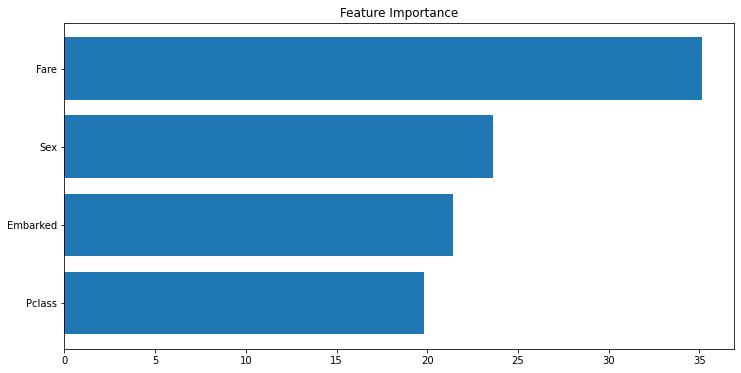

In [48]:
# Feature importance plot

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance')

In [49]:
# Import test data

df7 = pd.read_csv('test.csv')
df7

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [50]:
# Pick out desired columns

cols_to_keep = ['Pclass','Sex','Fare','Embarked']
df8 = df7[cols_to_keep]

df8

,Pclass,Sex,Fare,Embarked
0,3,male,7.8292,Q
1,3,female,7.0000,S
2,2,male,9.6875,Q
3,3,male,8.6625,S
4,3,female,12.2875,S
...,...,...,...,...
413,3,male,8.0500,S
414,1,female,108.9000,C
415,3,male,7.2500,S
416,3,male,8.0500,S


In [51]:
predictions = model.predict(df8)
# predictions = np.array(predictions)
# predictions = np.round(predictions)
# predictions = predictions.astype(int)

predictions

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [41]:
# for i in range(len(predictions)):
    
#     if predictions[i] == -1:
#         predictions[i] = 0
#     elif predictions[i] == 2:
#         predictions[i] = 1

# predictions

In [38]:
# np.count_nonzero(predictions==0) + np.count_nonzero(predictions==1)

In [52]:
df8['PassengerId'] = df7['PassengerId']
df8['Survived'] = predictions
df8 = df8.drop(columns=['Pclass','Sex','Fare','Embarked'])

df8

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [53]:
df8.to_csv('submission5.csv')